In [54]:
%matplotlib inline
import sys
from urllib2 import Request, urlopen, URLError
import time
from xml.etree import cElementTree as ET
from pyproj import Proj
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # makes plots pretty
from pandas import *
import pandas as pd
import numpy as np
#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [55]:
p1 = Proj(init='epsg:26915')

In [56]:

dev_str = '?key=iwAameW6cVPbv4PTdka8KEu3b&rt='
vid = []
lat = []
lon = []
x = []
y = []
stop_lat = []
stop_lon = []
stop_x = []
stop_y = []
trip_id = []
rt = []

In [57]:

url = 'http://www.ctabustracker.com/bustime/api/v1/'
request = Request(url+'getroutes'+dev_str)
response = urlopen(request)
out = response.read()
root = ET.fromstring(out)
temp = root.findall("./route/rt")
for i in range(len(temp)):
    temp[i] = temp[i].text
print temp
#temp = ['66']

['1', '2', '3', '4', '5', '6', '7', '8', '8A', '9', 'X9', '10', '11', '12', 'J14', '15', '18', '19', '20', '21', '22', '24', '26', '28', '29', '30', '34', '35', '36', '37', '39', '43', '44', '47', '48', '49', '49B', 'X49', '50', '51', '52', '52A', '53', '53A', '54', '54A', '54B', '55', '55A', '55N', '56', '57', '59', '60', '62', '62H', '63', '63W', '65', '66', '67', '68', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '81W', '82', '84', '85', '85A', '86', '87', '88', '90', '91', '92', '93', '94', '95E', '95W', '96', '97', 'X98', '100', '103', '106', '108', '111', '111A', '112', '115', '119', '120', '121', '124', '125', '126', '130', '132', '134', '135', '136', '143', '146', '147', '148', '151', '152', '155', '156', '157', '165', '169', '170', '171', '172', '192', '201', '205', '206', '992']


In [58]:
t0 = time.time()
for i in range(len(temp)):
    request = Request(url + 'getvehicles' + dev_str + temp[i])
    response = urlopen(request)
    out = response.read()
    #print out
    #print i

    root = ET.fromstring(out)
    #print root.findall('vehicle')
    for vehicle in root.findall('vehicle'):
        lat_t = float(vehicle.find('lat').text)
        lon_t = float(vehicle.find('lon').text)
        trip_id.append(vehicle.find('tatripid').text)
        #print vehicle.find('tatripid').text
        
        lat.append( lat_t )
        lon.append( lon_t )
        x_t, y_t = p1( lon_t, lat_t )
        x.append(x_t)
        y.append(y_t)
        rt.append(temp[i])
        vid.append(int(vehicle.find('vid').text))
d = {'trip_id': trip_id, 'lat': lat, 'lon': lon, 'x':x, 'y':y, 'rt': rt}
D = DataFrame(data = d, index = vid)
t1 = time.time()
total = t1-t0
print total

24.4539260864


In [59]:
for i in range(len(temp)):
    request = Request(url + 'getvehicles' + dev_str + temp[i])
    response = urlopen(request)
    out = response.read()
    #print out
    #print i

    root = ET.fromstring(out)
    #print root.findall('vehicle')

1293


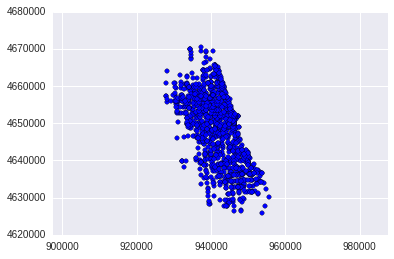

In [60]:
plt.scatter(x, y)
plt.axis('equal')
print len(x)

(932000.0, 948000.0, 4651200.0, 4652400.0)

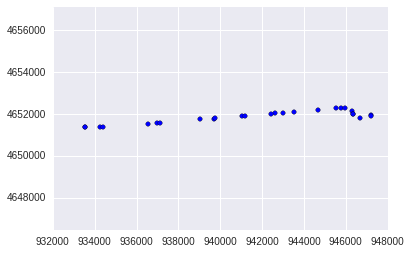

In [64]:
r = '66'
rt_np = np.array(rt)
x_np = np.array(x)[rt_np==r]
y_np = np.array(y)[rt_np==r]
plt.scatter(x_np, y_np)
plt.axis('equal')

In [62]:
request = Request(url + 'getvehicles' + dev_str +r)
response = urlopen(request)
out = response.read()
#print out
#print i
print out
root = ET.fromstring(out)
#print root.findall('vehicle')

<?xml version="1.0"?>
		<bustime-response>

        	<vehicle>
        		<vid>8106</vid>
        		<tmstmp>20160106 16:24</tmstmp>
        		
	    		<lat>41.896141052246094</lat>
            	<lon>-87.66287136077881</lon>
				<hdg>92</hdg>
        		
				<pid>4603</pid>
        		<rt>66</rt>
        		<des>Navy Pier</des>
        		<pdist>19653</pdist>
            	
            	
            	
            	
				
				<tablockid>66 -856</tablockid>
				<tatripid>673</tatripid>
				<zone></zone>  
            </vehicle>

        	<vehicle>
        		<vid>4121</vid>
        		<tmstmp>20160106 16:24</tmstmp>
        		
	    		<lat>41.89481653485979</lat>
            	<lon>-87.76518805367606</lon>
				<hdg>83</hdg>
        		
				<pid>6662</pid>
        		<rt>66</rt>
        		<des>Navy Pier</des>
        		<pdist>2550</pdist>
            	
            	
            	
            	
				
				<tablockid>66 -806</tablockid>
				<tatripid>678</tatripid>
				<zone></zone>  
            </vehicle>

In [63]:
Trips_DF = pd.DataFrame.from_csv('CTA_GTFS/trips.csv')
print Trips_DF

          service_id       trip_id  direction_id      block_id   shape_id  \
route_id                                                                    
1              45501  455093241881             0  455248009299    4556351   
1              45501  455093241943             1  455248008964    4556353   
1              45501  455093241944             1  455248008971    4556353   
1              45501  455093241945             0  455248008974    4556351   
1              45501  455093241946             1  455248008966    4556353   
1              45501  455093241947             1  455248008976    4556353   
1              45501  455093241948             0  455248008969    4556351   
1              45501  455093241949             1  455248008963    4556353   
1              45501  455093241950             0  455248008970    4556351   
1              45501  455093241951             1  455248008969    4556353   
1              45501  455093241952             0  455248008972    4556351   